# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
# YOUR CODE HERE

btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

print(json.dumps(btc_response,indent=2,sort_keys=True))


{
  "data": {
    "1": {
      "circulating_supply": 19094431,
      "id": 1,
      "last_updated": 1657907361,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 397933771096,
          "percent_change_1h": 0.535205078086171,
          "percent_change_24h": 1.53840509770365,
          "percent_change_7d": -3.86890884545129,
          "percentage_change_1h": 0.535205078086171,
          "percentage_change_24h": 1.53840509770365,
          "percentage_change_7d": -3.86890884545129,
          "price": 20823.0,
          "volume_24h": 44506617011
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 19094431,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1657907361
  }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
# YOUR CODE HERE

eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE

print(json.dumps(eth_response,indent=2,sort_keys=True))

{
  "data": {
    "1027": {
      "circulating_supply": 119691942,
      "id": 1027,
      "last_updated": 1657907367,
      "max_supply": 119691942,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 146770560264,
          "percent_change_1h": 1.23669628273512,
          "percent_change_24h": 4.29713789546176,
          "percent_change_7d": -1.24526071845914,
          "percentage_change_1h": 1.23669628273512,
          "percentage_change_24h": 4.29713789546176,
          "percentage_change_7d": -1.24526071845914,
          "price": 1224.93,
          "volume_24h": 17322923045
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 119691942,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1657907367
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
# YOUR CODE HERE

btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
# YOUR CODE HERE

print(btc_price)


20823.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
# YOUR CODE HERE

eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
# YOUR CODE HERE

print(eth_price)

1224.93


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins*btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE

print(btc_value)

24987.6


In [11]:
# Compute the current value of the ETH holding  # YOUR CODE HERE
eth_value = eth_price*eth_coins

# Print current value of your holding in ETH
# YOUR CODE HERE

print(eth_value)

6492.129


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding # YOUR CODE HERE
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE

print(total_crypto_wallet)

31479.729


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE

alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE

alpaca = tradeapi.REST(alpaca_api_key,
                       alpaca_secret_key,
                       api_version = 'v2')

display(type(alpaca_api_key),type(alpaca_secret_key))



str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE

tickers = ['AGG','SPY']

# Set timeframe to 1Day
# YOUR CODE HERE

timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE

start_date = pd.Timestamp('2022-07-12',tz='America/New_York').isoformat()
end_date   = pd.Timestamp('2022-07-12',tz='America/New_York').isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE

prices_df = alpaca.get_bars(tickers,
                timeframe,
                start = start_date,
                end = end_date,
               ).df
                
    
#display(prices_df)

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

AGG = prices_df[prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)

SPY = prices_df[prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE

prices_df = pd.concat([AGG,SPY],axis = 1, keys = ['AGG','SPY'])                                         
                                          
# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
                                          
prices_df.head()


AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-07-12 04:00:00+00:00  102.02  102.19  101.82  101.84  6664991   

                                                     SPY                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2022-07-12 04:00:00+00:00       21057  102.03944  383.66  386.16  378.99   

                                                                    
                            close    volume trade_count       vwap  
timestamp                                                           
2022-07-12 04:00:00+00:00  380.83  62027220      512244  382.61762

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
 # YOUR CODE HERE
    
agg_close_price = prices_df['AGG']['close'].iloc[0]

# Print the AGG closing price
# YOUR CODE HERE

print(agg_close_price, type(agg_close_price))



101.84 <class 'numpy.float64'>


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number # YOUR CODE HERE
spy_close_price = prices_df['SPY']['close'].iloc[0]

# Print the SPY closing price
# YOUR CODE HERE

print(spy_close_price, type(spy_close_price))


380.83 <class 'numpy.float64'>


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio # YOUR CODE HERE
agg_value = agg_close_price*agg_shares

# Print the current value of the bond portfolio
# YOUR CODE HERE

print(agg_value)

20368.0


In [20]:
# Calculate the current value of the stock portion of the portfolio # YOUR CODE HERE
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
# YOUR CODE HERE

print(spy_value)

41891.299999999996


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio # YOUR CODE HERE
total_stocks_bonds = agg_value+spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

print(total_stocks_bonds)

62259.299999999996


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
 # YOUR CODE HERE
    
total_portfolio = total_crypto_wallet +total_stocks_bonds

# Print current cryptocurrency wallet balance <----- did you mean the total_portfolio balance?
# I'll just print both

# YOUR CODE HERE

print(f'Cryptocurrency Wallet Balance: {total_crypto_wallet:.2f}')

print(f'Entire Savings Portfolio Balance: {total_portfolio:.2f}')



Cryptocurrency Wallet Balance: 31479.73
Entire Savings Portfolio Balance: 93739.03


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE

savings_data = [total_crypto_wallet,total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE

savings_data

[31479.729, 62259.299999999996]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE

savings_df = pd.DataFrame(savings_data,columns=["amount"],index=["crypto","stock/bond"])

# Display the savings_df DataFrame
# YOUR CODE HERE
                                                               
savings_df


,amount
crypto,31479.729
stock/bond,62259.300


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portions of the Portfolio'}, ylabel='amount'>

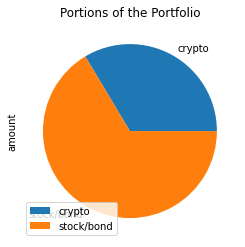

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE

savings_df.plot(kind='pie',y='amount', title='Portions of the Portfolio')

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE

emergency_fund_value = monthly_income*3


emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE

if total_portfolio > emergency_fund_value:
    print(f'Congratulations for having enough money in this fund!')
elif total_portfolio == emergency_fund_value:
    print(f'Congratulations on reaching this important financial goal!')
else:
    print(f'You are {emergency_fund_value-total_portfolio} dollars away from reaching the goal.')
    


Congratulations for having enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE

start_date= pd.Timestamp('2019-07-14',tz='America/New_York').isoformat()
end_date= pd.Timestamp('2022-07-14',tz='America/New_York').isoformat()



In [29]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE

prices_df = alpaca.get_bars(tickers,
                timeframe,
                start=start_date,
                end=end_date,
               ).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE

AGG = prices_df[prices_df['symbol'] == 'AGG'].drop('symbol', axis=1)

SPY = prices_df[prices_df['symbol'] == 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE

prices_df = pd.concat([AGG,SPY],axis = 1, keys = ['AGG','SPY'])    

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE

display(prices_df.head(),prices_df.tail())


AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  110.87  110.960  110.85  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-07-15 04:00:00+00:00       10885  110.925638  301.12  301.13  300.19   
2019-07-16 04:00:00+00:00       12676  110.743438  300.64  300.88  299.44   
2019-07-17 04:00:00+00:00       11771  111.066605  299.77  299.93  297.74   
2019-07-18 04:00:00+00:00       17331  111.220550  297.18  299.25  296.70   
2019-07-19 04:00:00+00:00        9948  111.225017  300.01  300.07  296.96   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-07-15 04:00:00+00:00  300.75  33992129      149900  300.605019  
2019-07-16 04:00:00+00:00  299.71  40807546      183816  300.108039  
2019-07-17 04:00:00+00:00  297.74  44343835      200151  298.543544  
2019-07-18 04:00:00+00:00  298.83  53567032      236661  298.067797  
2019-07-19 04:00:00+00:00  297.17  76794138      260715  298.617649

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-07-08 04:00:00+00:00  101.35  101.4499  101.1600  101.23  5269814   
2022-07-11 04:00:00+00:00  101.67  101.9200  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.1900  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.2400  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.9800  101.3300  101.85  6224496   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-07-08 04:00:00+00:00       19181  101.268556  387.16  390.6400  385.660   
2022-07-11 04:00:00+00:00       17084  101.720884  385.91  386.8700  383.500   
2022-07-12 04:00:00+00:00       21057  102.039440  383.66  386.1600  378.990   
2022-07-13 04:00:00+00:00       26716  101.977478  375.09  381.9200  374.658   
2022-07-14 04:00:00+00:00       24722  101.747120  373.99  379.0498  371.040   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-08 04:00:00+00:00  388.67  72468892      509776  388.661805  
2022-07-11 04:00:00+00:00  384.23  58100363      473423  384.871994  
2022-07-12 04:00:00+00:00  380.83  62027220      512244  382.617620  
2022-07-13 04:00:00+00:00  378.83  83575452      671953  378.819688  
2022-07-14 04:00:00+00:00  377.91  89349688      637416  375.589384

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

MC_spy = MCSimulation(portfolio_data=prices_df,
             weights=[.40,.60],
             num_simulation=500,
             num_trading_days = 30*252,
            )
             

# Review the simulation input data
# YOUR CODE HERE

MC_spy.portfolio_data.head()

AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  110.87  110.960  110.85  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00       10885  110.925638          NaN  301.12   
2019-07-16 04:00:00+00:00       12676  110.743438    -0.001082  300.64   
2019-07-17 04:00:00+00:00       11771  111.066605     0.002617  299.77   
2019-07-18 04:00:00+00:00       17331  111.220550     0.001620  297.18   
2019-07-19 04:00:00+00:00        9948  111.225017    -0.001168  300.01   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  301.13  300.19  300.75  33992129      149900   
2019-07-16 04:00:00+00:00  300.88  299.44  299.71  40807546      183816   
2019-07-17 04:00:00+00:00  299.93  297.74  297.74  44343835      200151   
2019-07-18 04:00:00+00:00  299.25  296.70  298.83  53567032      236661   
2019-07-19 04:00:00+00:00  300.07  296.96  297.17  76794138      260715   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  300.605019          NaN  
2019-07-16 04:00:00+00:00  300.108039    -0.003458  
2019-07-17 04:00:00+00:00  298.543544    -0.006573  
2019-07-18 04:00:00+00:00  298.067797     0.003661  
2019-07-19 04:00:00+00:00  298.617649    -0.005555

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE

MC_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Noah Saleh\Desktop\BCS\homework\challenges\5th_Challenge\financial_planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012514,0.979850,0.995812,0.995560,0.998024,1.005032,1.000425,1.019284,1.000548,1.012188,...,0.999067,0.988297,0.997889,1.004055,1.001291,0.990035,0.993772,0.983673,1.002303,1.000378
2,1.018502,0.970251,0.991527,0.999733,0.997768,1.015039,1.014603,1.013404,1.011379,1.010779,...,1.011710,0.993632,0.983906,0.998721,1.001532,1.005411,0.982961,0.963658,1.011216,1.013289
3,1.014076,0.964090,0.984530,1.003166,1.004077,1.022254,1.011320,0.994661,1.009912,1.020418,...,1.000161,0.995784,0.978719,1.002790,0.995186,1.008662,0.986216,0.966010,0.997759,1.011705
4,1.020239,0.954309,0.987393,1.000837,0.998026,1.030292,1.007358,0.977370,1.010502,1.006346,...,0.994264,0.997074,0.960388,1.003567,0.995381,1.020867,0.993817,0.962701,0.998556,1.003799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.559406,6.691053,4.014088,7.447725,4.640650,3.952629,4.712681,13.387392,2.734208,2.083113,...,4.179302,3.117963,1.938072,0.702127,1.557407,1.972912,1.578094,5.181920,4.102718,2.580243
7557,15.603163,6.604985,4.043339,7.481324,4.567734,3.995524,4.762884,13.237596,2.725821,2.104126,...,4.209588,3.134537,1.939261,0.697209,1.580995,1.987580,1.578077,5.230129,4.079516,2.611495
7558,15.602868,6.592145,4.069439,7.529116,4.565678,3.929785,4.742389,13.499888,2.732990,2.099972,...,4.201041,3.116456,1.941719,0.701286,1.567806,2.011560,1.572285,5.182625,4.142645,2.612367
7559,15.528855,6.616429,4.016482,7.427232,4.561604,3.978999,4.716076,13.447195,2.685145,2.096096,...,4.200924,3.080622,1.950659,0.709026,1.581810,2.001207,1.537027,5.147379,4.168252,2.620490


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

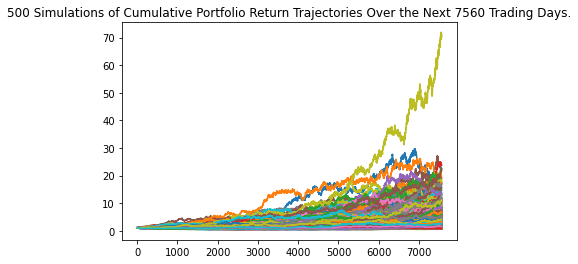

In [37]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

MC_spy.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

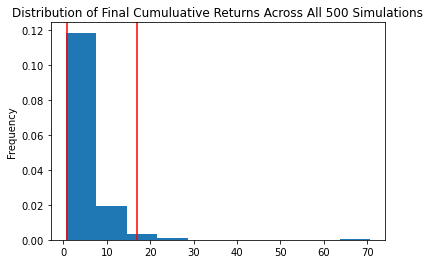

In [38]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

MC_spy.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [39]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

spy_table = MC_spy.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE

spy_table

count           500.000000
mean              4.891546
std               4.870183
min               0.548568
25%               2.078451
50%               3.711090
75%               6.136054
max              70.667940
95% CI Lower      0.792007
95% CI Upper     16.859248
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [40]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

total_stocks_bonds

62259.299999999996

In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# YOUR CODE HERE
# YOUR CODE HERE
ci_lower_thirty_cumulative_return = round(spy_table[8]*total_stocks_bonds,2)
ci_upper_thirty_cumulative_return = round(spy_table[9]*total_stocks_bonds,2)

# Print the result of your calculations
# YOUR CODE HERE

print(f"There is a 95% chance that an initial investment of $62,259.30 in the portfolio"
      f" with a 60% weight in SPY over the next 5 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")

There is a 95% chance that an initial investment of $62,259.30 in the portfolio with a 60% weight in SPY over the next 5 years will end within in the range of $49309.79 and $1049644.99.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [44]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

MC_spy80 = MCSimulation(portfolio_data=prices_df,
             weights=[.20,.80],
             num_simulation=500,
             num_trading_days = 10*252,
            )

# Review the simulation input data
# YOUR CODE HERE

MC_spy80.portfolio_data.head()



AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  110.87  110.960  110.85  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00       10885  110.925638          NaN  301.12   
2019-07-16 04:00:00+00:00       12676  110.743438    -0.001082  300.64   
2019-07-17 04:00:00+00:00       11771  111.066605     0.002617  299.77   
2019-07-18 04:00:00+00:00       17331  111.220550     0.001620  297.18   
2019-07-19 04:00:00+00:00        9948  111.225017    -0.001168  300.01   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  301.13  300.19  300.75  33992129      149900   
2019-07-16 04:00:00+00:00  300.88  299.44  299.71  40807546      183816   
2019-07-17 04:00:00+00:00  299.93  297.74  297.74  44343835      200151   
2019-07-18 04:00:00+00:00  299.25  296.70  298.83  53567032      236661   
2019-07-19 04:00:00+00:00  300.07  296.96  297.17  76794138      260715   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  300.605019          NaN  
2019-07-16 04:00:00+00:00  300.108039    -0.003458  
2019-07-17 04:00:00+00:00  298.543544    -0.006573  
2019-07-18 04:00:00+00:00  298.067797     0.003661  
2019-07-19 04:00:00+00:00  298.617649    -0.005555

In [45]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE

MC_spy80.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Noah Saleh\Desktop\BCS\homework\challenges\5th_Challenge\financial_planner\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995155,0.979365,1.017205,1.020988,0.999306,0.997128,1.005643,1.013455,1.000008,0.985390,...,1.001025,1.001138,1.020696,0.988737,0.995299,0.977383,0.984834,0.996940,1.022716,0.980810
2,1.000254,0.979985,1.032196,1.029622,1.016535,1.002966,1.008906,1.030817,0.985962,0.977381,...,0.998222,0.996070,1.021301,0.987037,1.014677,0.963684,0.983885,0.980329,1.014799,0.964587
3,1.009695,0.980746,1.000087,1.012640,1.024885,1.006177,1.006096,1.031356,0.983991,0.961245,...,0.991691,1.019388,1.022991,0.986209,0.999596,0.939730,0.981676,0.985411,1.041899,0.927262
4,1.013283,0.987246,1.005233,1.013376,1.030291,0.993414,1.004038,1.038884,0.998621,0.973774,...,0.989012,1.051398,1.034751,0.982049,0.998226,0.930708,0.975863,0.980273,1.035163,0.932335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.323130,2.132112,3.259188,4.109657,2.051780,1.199877,2.041789,2.207324,1.634310,1.356336,...,1.171716,1.935107,3.542432,1.968897,1.204241,0.997147,0.877571,3.151742,3.352855,1.795290
2517,1.352549,2.091682,3.251754,4.048642,2.015389,1.193403,2.055458,2.260234,1.651027,1.350739,...,1.174642,1.946746,3.546822,1.942371,1.195453,1.011672,0.879157,3.149174,3.346049,1.786309
2518,1.355608,2.143379,3.203246,4.091283,2.011306,1.200112,2.079103,2.252773,1.650747,1.362289,...,1.167044,1.945782,3.586436,1.937646,1.209683,1.027314,0.882810,3.142781,3.318361,1.791907
2519,1.342016,2.157680,3.177793,4.065493,1.983703,1.210026,2.127572,2.251657,1.629991,1.367936,...,1.139802,1.926921,3.585359,1.964688,1.204261,1.039897,0.885579,3.163252,3.255178,1.756126


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

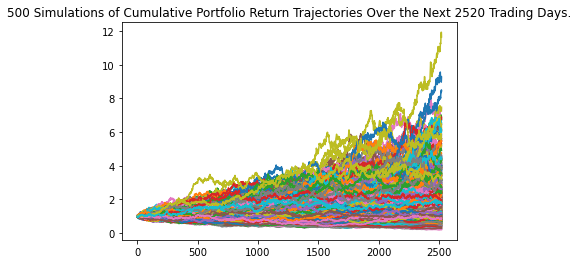

In [46]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE

MC_spy80.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

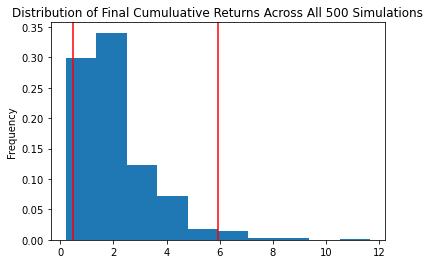

In [47]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE

MC_spy80.plot_distribution()

In [48]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

spy80_table = MC_spy80.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

spy80_table

count           500.000000
mean              2.098509
std               1.428031
min               0.207761
25%               1.158222
50%               1.768131
75%               2.578163
max              11.653853
95% CI Lower      0.467807
95% CI Upper      5.948024
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [49]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE

total_stocks_bonds

62259.299999999996

In [52]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
# YOUR CODE HERE
# YOUR CODE HERE

ci_lower_ten_cumulative_return = round(spy80_table[8]*total_stocks_bonds,2)
ci_upper_ten_cumulative_return = round(spy80_table[9]*total_stocks_bonds,2)

# Print the result of your calculations
# YOUR CODE HERE

print(f"There is a 95% chance that an initial investment of $62,259.30 in the portfolio"
      f" with a 80% weight in SPY over the next 5 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")

There is a 95% chance that an initial investment of $62,259.30 in the portfolio with a 80% weight in SPY over the next 5 years will end within in the range of $29125.35 and $370319.81.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** # YOUR ANSWER HERE

No, not necesarily. It depends on how much money you consider "enough" for retirement. But on average, you're just going to double your money to about 120,000, which isn't enough for retirement in my opinion. So, most likely, no.